### Reading and Understanding the data

In [121]:
# Importing all required packages:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, train_test_split



In [122]:
# supress warnings

import warnings
warnings.filterwarnings('ignore')

In [123]:
# Import dataset

housing = pd.read_csv('train_adv reg.csv')

In [124]:
# Read dataset

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [125]:
# info 

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [126]:
# shape

housing.shape

(1460, 81)

In [127]:
# describe

housing.describe([.90,.95])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data Cleaning

In [128]:
# checking null values in percentages

round(100*(housing.isnull().sum()/len(housing.index)),2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

In [129]:
# columns which have more than 10 percent of null values

round(100*(housing.isnull().sum()/len(housing.index)),2)[round(100*(housing.isnull().sum()/len(housing.index)),2).values>10]

LotFrontage    17.74
Alley          93.77
FireplaceQu    47.26
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

In [130]:
# Lets drop the columns of high percentage of null values

housing = housing.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)

In [131]:
# check dataset

housing.shape

(1460, 75)

In [132]:
# Lets check the columns which have 0 - 10 % of null values

round(100*(housing.isnull().sum()/len(housing.index)),2)[round(100*(housing.isnull().sum()/len(housing.index)),2).values>0.1]

MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64

In [133]:
# Replace NA with None :

for col in ( 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Electrical'):
    housing[col] = housing[col].fillna('None')

In [134]:
# imputing missing values:

housing.MasVnrType.fillna(housing.MasVnrType.mode(),inplace=True)
housing.MasVnrArea.fillna(housing.MasVnrArea.mean(),inplace=True)
housing.BsmtQual.fillna(housing.BsmtQual.mode(),inplace=True)
housing.BsmtCond.fillna(housing.BsmtCond.mode(),inplace=True)
housing.BsmtExposure.fillna(housing.BsmtExposure.mode(),inplace=True)
housing.BsmtFinType1.fillna(housing.BsmtFinType1.mode(),inplace=True)
housing.BsmtFinType2.fillna(housing.BsmtFinType2.mode(),inplace=True)
housing.GarageType.fillna(housing.GarageType.mode(),inplace=True)
housing.GarageYrBlt.fillna(-1,inplace=True)
housing.GarageFinish.fillna(housing.GarageFinish.mode(),inplace=True)
housing.GarageQual.fillna(housing.GarageQual.mode(),inplace=True)
housing.GarageCond.fillna(housing.GarageCond.mode(),inplace=True)


In [135]:
# checking null values:

round(100*(housing.isnull().sum()/len(housing.index)),2)[round(100*(housing.isnull().sum()/len(housing.index)),2).values>0.0]

Series([], dtype: float64)

In [136]:
# creating new columns 'Isremodelled'
# diff btw remodelled and year built

def Remodel(x):
    if(x['YearBuilt'] == x['YearRemodAdd']):
        return 0
    elif(x['YearBuilt'] < x['YearRemodAdd']):
        return 1
    else:
        return 2
    
housing['IsRemodelled'] = housing.apply(Remodel, axis=1)
housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,0


In [137]:
# we gonna convert year columns into the ages, where we gonna fill with number,

housing['YearBuilt_Old'] = housing.YearBuilt.max()-housing.YearBuilt
housing['YearRemodAdd_Old'] = housing.YearRemodAdd.max()-housing.YearRemodAdd
housing['GarageYrBlt_Old'] = housing.GarageYrBlt.max()-housing.GarageYrBlt
housing['YrSold_Old'] = housing.YrSold.max()-housing.YrSold

In [138]:
# Lets check Years column, how does it work

housing[['YearBuilt_Old','YearRemodAdd_Old','GarageYrBlt_Old','YrSold_Old']].head()

,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,7,7,7.0,2
1,34,34,34.0,3
2,9,8,9.0,2
3,95,40,12.0,4
4,10,10,10.0,2


In [139]:
# data type :

(housing[['YearBuilt_Old','YearRemodAdd_Old','GarageYrBlt_Old','YrSold_Old']]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YearBuilt_Old     1460 non-null   int64  
 1   YearRemodAdd_Old  1460 non-null   int64  
 2   GarageYrBlt_Old   1460 non-null   float64
 3   YrSold_Old        1460 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 45.8 KB


In [140]:
#Lets check dataset:

housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,2008,WD,Normal,208500,0,7,7,7.0,2
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,5,2007,WD,Normal,181500,0,34,34,34.0,3
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,9,2008,WD,Normal,223500,1,9,8,9.0,2
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2,2006,WD,Abnorml,140000,1,95,40,12.0,4
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,12,2008,WD,Normal,250000,0,10,10,10.0,2


In [141]:
# Lets drop the actual year columns

housing = housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)

In [142]:
# shape

housing.shape

(1460, 76)

In [143]:
len(housing.index)

1460

In [144]:
85/100 * 1460

1241.0

In [145]:
# removing high skewed columns
# skewed means columns that have more than 85% values associated to a specific value


column = []
categorical_columns = housing.select_dtypes(include=['object'])
for col in (categorical_columns):
    if(housing[col].value_counts().max() >= 1241):
         column.append(col)


In [146]:
# check the columns of high skewed:

column

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType']

In [147]:
# drop the high skewed columns:

housing.drop(column,axis=1,inplace=True)

In [148]:
# shape of new dataset after dropping:

housing.shape

(1460, 58)

In [149]:
# check for duplicates:

housing[housing.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,PoolArea,MiscVal,MoSold,SaleCondition,SalePrice,IsRemodelled,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old


In [150]:
# checking outliers:

housing.describe([.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,IsRemodelled,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,...,15.060959,2.758904,43.489041,6.321918,180921.195890,0.476712,38.732192,25.134247,141.315753,2.184247
std,421.610009,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,...,55.757415,40.177307,496.123024,2.703626,79442.502883,0.499629,30.202904,20.645407,453.925967,1.328095
min,1.000000,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,5.000000,129975.000000,0.000000,10.000000,6.000000,9.000000,1.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,0.000000,0.000000,6.000000,163000.000000,0.000000,37.000000,16.000000,33.000000,2.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,...,0.000000,0.000000,0.000000,8.000000,214000.000000,1.000000,56.000000,43.000000,52.000000,3.000000
90%,1314.100000,120.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,...,0.000000,0.000000,0.000000,10.000000,278000.000000,1.000000,85.100000,60.000000,82.000000,4.000000
95%,1387.050000,160.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,...,160.000000,0.000000,0.000000,11.000000,326100.000000,1.000000,94.000000,60.000000,2011.000000,4.000000
99%,1445.410000,190.000000,37567.640000,10.000000,9.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,...,268.050000,0.000000,700.000000,12.000000,442567.010000,1.000000,110.820000,60.000000,2011.000000,4.000000


In [151]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   MSSubClass        1460 non-null   int64  
 2   MSZoning          1460 non-null   object 
 3   LotArea           1460 non-null   int64  
 4   LotShape          1460 non-null   object 
 5   LotConfig         1460 non-null   object 
 6   Neighborhood      1460 non-null   object 
 7   BldgType          1460 non-null   object 
 8   HouseStyle        1460 non-null   object 
 9   OverallQual       1460 non-null   int64  
 10  OverallCond       1460 non-null   int64  
 11  RoofStyle         1460 non-null   object 
 12  Exterior1st       1460 non-null   object 
 13  Exterior2nd       1460 non-null   object 
 14  MasVnrType        1460 non-null   object 
 15  MasVnrArea        1460 non-null   float64
 16  ExterQual         1460 non-null   object 


### Outlier Treatment

In [152]:
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,IsRemodelled,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,1,60,8450,7,5,196.0,706,0,150,856,...,0,0,0,2,208500,0,7,7,7.0,2
1,2,20,9600,6,8,0.0,978,0,284,1262,...,0,0,0,5,181500,0,34,34,34.0,3
2,3,60,11250,7,5,162.0,486,0,434,920,...,0,0,0,9,223500,1,9,8,9.0,2
3,4,70,9550,7,5,0.0,216,0,540,756,...,0,0,0,2,140000,1,95,40,12.0,4
4,5,60,14260,8,5,350.0,655,0,490,1145,...,0,0,0,12,250000,0,10,10,10.0,2


In [153]:
housing_numeric.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'SalePrice', 'IsRemodelled', 'YearBuilt_Old',
       'YearRemodAdd_Old', 'GarageYrBlt_Old', 'YrSold_Old'],
      dtype='object')

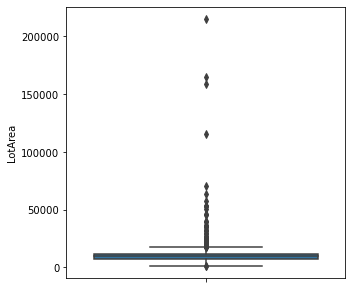

In [154]:
# Check the outliers in all the numeric columns
# plotting 'LotArea'

plt.figure(figsize=(5,5))
sns.boxplot(y = 'LotArea', data = housing)

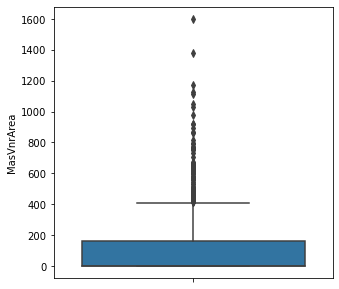

In [155]:
# plot on 'MasVnrArea'

plt.figure(figsize=(5,5))
sns.boxplot(y = 'MasVnrArea', data = housing)

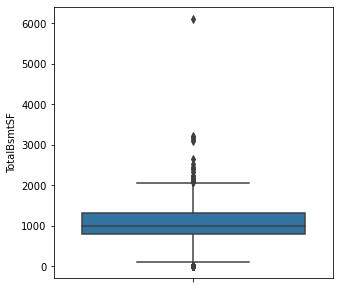

In [156]:
# plot on 'TotalBsmtSF'

plt.figure(figsize=(5,5))
sns.boxplot(y = 'TotalBsmtSF', data = housing)

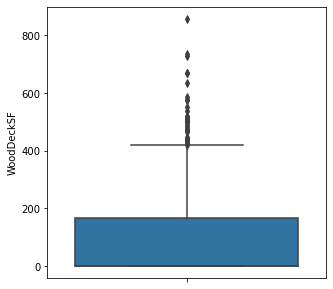

In [157]:
# plot on 'WoodDeckSF'

plt.figure(figsize=(5,5))
sns.boxplot(y = 'WoodDeckSF', data = housing)


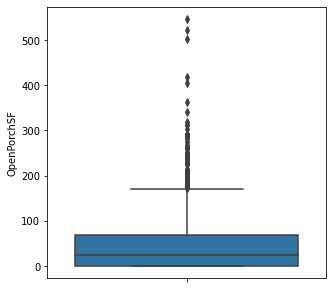

In [158]:
# plot on 'OpenPorchSF'

plt.figure(figsize=(5,5))
sns.boxplot(y = 'OpenPorchSF',data = housing)


In [159]:
# Removing Outliers

# Removing values beyond 98% for LotArea

LotArea = housing['LotArea'].quantile(0.98)
housing = housing[housing["LotArea"] <LotArea]

# Removing values beyond 98% for MasVnrArea

MasVnrArea = housing['MasVnrArea'].quantile(0.98)
housing = housing[housing["MasVnrArea"] < MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

TotalBsmtSF = housing['TotalBsmtSF'].quantile(0.99)
housing = housing[housing["TotalBsmtSF"] < TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

WoodDeckSF = housing['WoodDeckSF'].quantile(0.99)
housing = housing[housing["WoodDeckSF"] < WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

OpenPorchSF = housing['OpenPorchSF'].quantile(0.99)
housing = housing[housing["OpenPorchSF"] < OpenPorchSF]

In [160]:
# Determine the percentage of data retained

num_data = round(100*(len(housing)/1460),2)
print(num_data)

93.01


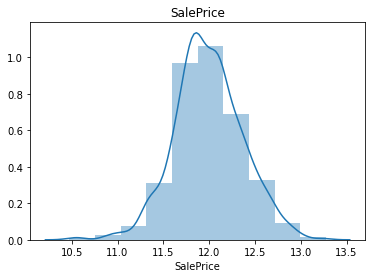

In [161]:
# Data visualization:
# before visualizing, we have to transform the variables.

housing['SalePrice'] = np.log(housing['SalePrice'])

plt.title('SalePrice')
sns.distplot(housing['SalePrice'], bins=10)
plt.show()

In [162]:
# the target variable is distibuted normally

### Visualizing

<Figure size 720x360 with 0 Axes>

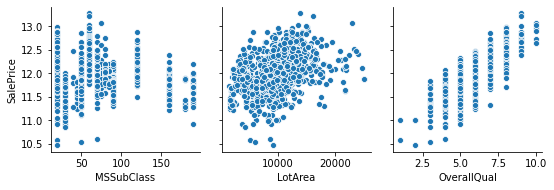

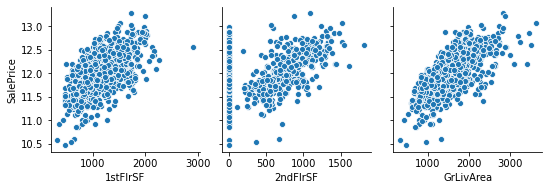

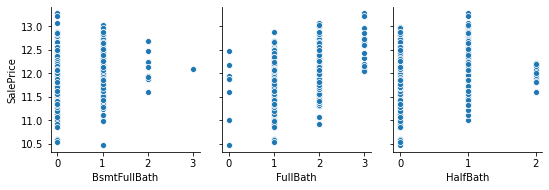

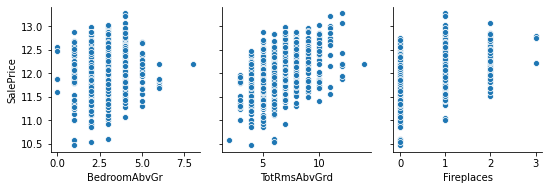

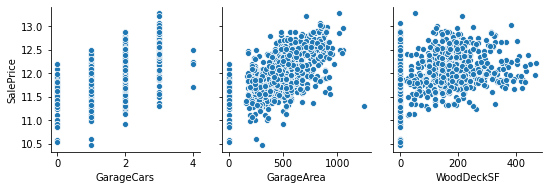

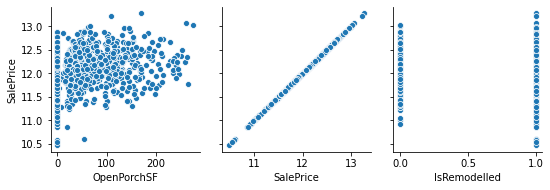

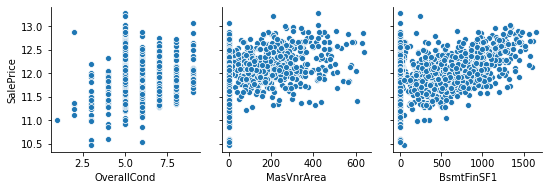

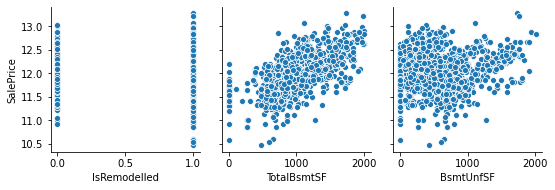

In [163]:
plt.figure(figsize=(10,5))
sns.pairplot(housing, x_vars=['MSSubClass','LotArea','OverallQual'], y_vars='SalePrice', aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice', aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice', aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice', aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['OverallCond','MasVnrArea','BsmtFinSF1',], y_vars='SalePrice',aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['IsRemodelled','TotalBsmtSF', 'BsmtUnfSF'] ,y_vars='SalePrice', aspect=1,kind='scatter')
plt.show()

In [164]:
# correlation matrix

housing_numeric.corr()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,IsRemodelled,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.050199,-0.005024,-0.005968,-0.007940,-0.015415,...,0.001330,0.057044,-0.006242,0.021172,-0.021917,-0.003342,0.012713,0.021998,-0.013491,-0.000712
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.026030,0.008283,-0.007683,-0.013585,-0.084284,-0.058553,-0.027850,-0.040581,0.080999,0.021407
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.103960,0.214103,0.111170,-0.002618,0.260833,...,0.043160,0.077672,0.038068,0.001205,0.263843,0.004274,-0.014228,-0.013788,-0.072600,0.014261
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.410238,0.239666,-0.059119,0.308159,0.537808,...,0.064886,0.065166,-0.031406,0.070815,0.790982,-0.080468,-0.572323,-0.550684,-0.288984,0.027347
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,...,0.054811,-0.001985,0.068777,-0.003511,-0.077856,0.308884,0.375983,-0.073741,0.006507,-0.043950
MasVnrArea,-0.050199,0.022895,0.103960,0.410238,-0.127788,1.000000,0.263582,-0.072302,0.114184,0.362452,...,0.061453,0.011723,-0.029815,-0.005940,0.475241,-0.101209,-0.314745,-0.179186,-0.133728,0.008184
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.263582,1.000000,-0.050117,-0.495251,0.522396,...,0.062021,0.140491,0.003571,-0.015727,0.386420,-0.102179,-0.249503,-0.128451,-0.115839,-0.014359
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.072302,-0.050117,1.000000,-0.209294,0.104810,...,0.088871,0.041709,0.004940,-0.015211,-0.011378,-0.013949,0.049107,0.067759,-0.035072,-0.031706
BsmtUnfSF,-0.007940,-0.140759,-0.002618,0.308159,-0.136841,0.114184,-0.495251,-0.209294,1.000000,0.415360,...,-0.012579,-0.035092,-0.023837,0.034888,0.214479,0.027472,-0.149040,-0.181133,-0.042715,0.041258
TotalBsmtSF,-0.015415,-0.238518,0.260833,0.537808,-0.171098,0.362452,0.522396,0.104810,0.415360,1.000000,...,0.084489,0.126053,-0.018479,0.013196,0.613581,-0.083690,-0.391452,-0.291066,-0.176351,0.014969


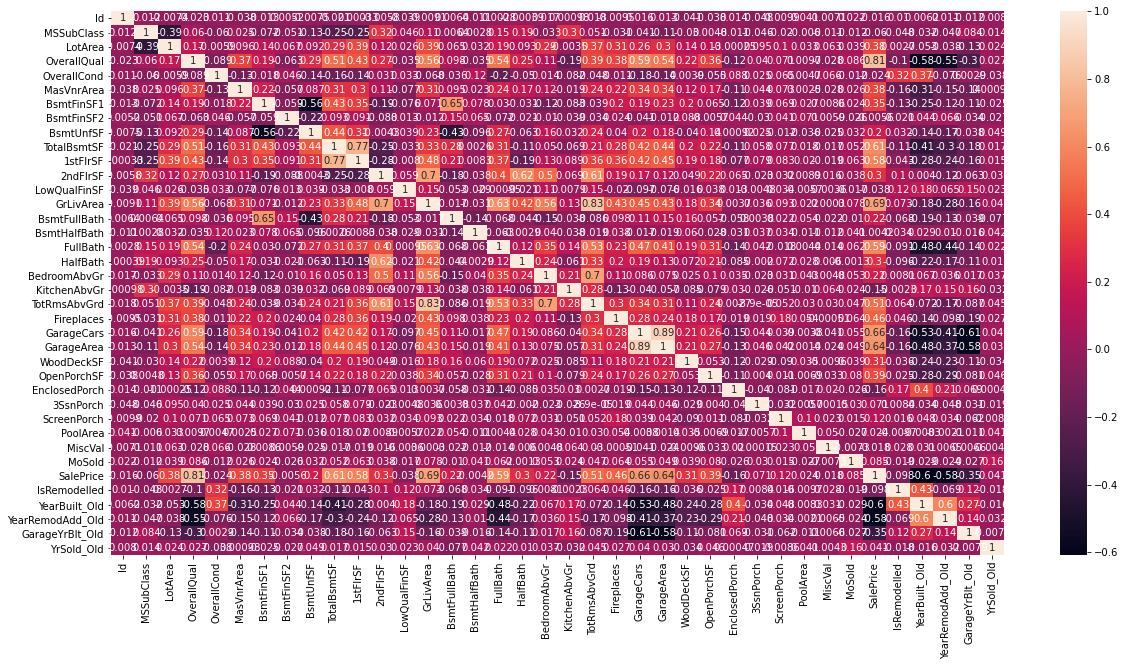

In [165]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(housing.corr(), annot = True)
plt.show()

In [166]:
# TotRmsAbvGrd and GrLivArea show 82%
# Garage Area and Garage Cars show 88%

# remove those variables
# Removing the highly correlated variables

housing.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [167]:
# Check the shape of the dataframe

housing.shape

(1358, 56)

In [168]:
housing.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,PoolArea,MiscVal,MoSold,SaleCondition,SalePrice,IsRemodelled,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,1,60,RL,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,0,2,Normal,12.247694,0,7,7,7.0,2
1,2,20,RL,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,0,5,Normal,12.109011,0,34,34,34.0,3
2,3,60,RL,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,0,0,9,Normal,12.317167,1,9,8,9.0,2
3,4,70,RL,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,0,0,2,Abnorml,11.849398,1,95,40,12.0,4
4,5,60,RL,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,0,0,12,Normal,12.429216,0,10,10,10.0,2


In [169]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Data columns (total 56 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1358 non-null   int64  
 1   MSSubClass        1358 non-null   int64  
 2   MSZoning          1358 non-null   object 
 3   LotArea           1358 non-null   int64  
 4   LotShape          1358 non-null   object 
 5   LotConfig         1358 non-null   object 
 6   Neighborhood      1358 non-null   object 
 7   BldgType          1358 non-null   object 
 8   HouseStyle        1358 non-null   object 
 9   OverallQual       1358 non-null   int64  
 10  OverallCond       1358 non-null   int64  
 11  RoofStyle         1358 non-null   object 
 12  Exterior1st       1358 non-null   object 
 13  Exterior2nd       1358 non-null   object 
 14  MasVnrType        1358 non-null   object 
 15  MasVnrArea        1358 non-null   float64
 16  ExterQual         1358 non-null   object 


### Data Preparation

In [170]:
# Converting categorical data into numercal data
# Creating Dummies

# values of the following fields are ordered list, we shall assign values to them in sequence
# For values which are ordered, we have given an ordered sequence 
# For values which cannot be ordered, we have given them into 0 and 1

housing['ordered_LotShape'] = housing['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housing['ordered_ExterQual'] = housing['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housing['ordered_BsmtQual'] = housing['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['ordered_BsmtExposure'] = housing['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing['ordered_BsmtFinType1'] = housing['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
housing['ordered_HeatingQC'] = housing['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['ordered_KitchenQual'] = housing['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['ordered_GarageFinish'] = housing['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housing['ordered_BldgType'] = housing['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 'None': 0 })
housing['ordered_HouseStyle'] = housing['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housing['ordered_LotConfig'] = housing['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 'None': 0  })
housing['ordered_MasVnrType'] = housing['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housing['ordered_SaleCondition'] = housing['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 'Alloca': 0, 'AdjLand': 0, 'None': 0})
housing.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,ordered_BsmtExposure,ordered_BsmtFinType1,ordered_HeatingQC,ordered_KitchenQual,ordered_GarageFinish,ordered_BldgType,ordered_HouseStyle,ordered_LotConfig,ordered_MasVnrType,ordered_SaleCondition
0,1,60,RL,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,1,6,5,4,2,1,4,5,1,1
1,2,20,RL,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,4,5,5,3,2,1,1,2,0,1
2,3,60,RL,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,2,6,5,4,2,1,4,5,1,1
3,4,70,RL,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,1,5,4,4,1,1,4,4,0,0
4,5,60,RL,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,3,6,5,4,2,1,4,2,1,1


In [171]:
# drop the old columns 

# drop the id column as it will not be used any more

housing = housing.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',  'GarageFinish', 'BldgType', 'HouseStyle','LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

housing.head()

,MSSubClass,MSZoning,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,...,ordered_BsmtExposure,ordered_BsmtFinType1,ordered_HeatingQC,ordered_KitchenQual,ordered_GarageFinish,ordered_BldgType,ordered_HouseStyle,ordered_LotConfig,ordered_MasVnrType,ordered_SaleCondition
0,60,RL,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,196.0,...,1,6,5,4,2,1,4,5,1,1
1,20,RL,9600,Veenker,6,8,Gable,MetalSd,MetalSd,0.0,...,4,5,5,3,2,1,1,2,0,1
2,60,RL,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,162.0,...,2,6,5,4,2,1,4,5,1,1
3,70,RL,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,0.0,...,1,5,4,4,1,1,4,4,0,0
4,60,RL,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,350.0,...,3,6,5,4,2,1,4,2,1,1


In [172]:
# For the following columns create dummies

# Creating dummies for MSZoning

new_MSZoning = pd.get_dummies(housing['MSZoning'], prefix='MSZoning', drop_first = True)
housing = pd.concat([housing, new_MSZoning], axis = 1)

# Creating dummies for Neighborhood

new_Neighborhood = pd.get_dummies(housing['Neighborhood'], prefix='Neighborhood', drop_first = True)
housing = pd.concat([housing, new_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

new_RoofStyle = pd.get_dummies(housing['RoofStyle'], prefix='RoofStyle', drop_first = True)
housing = pd.concat([housing, new_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

new_Exterior1st = pd.get_dummies(housing['Exterior1st'], prefix='Exterior1st', drop_first = True)
housing = pd.concat([housing, new_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

new_Exterior2nd = pd.get_dummies(housing['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housing = pd.concat([housing, new_Exterior2nd], axis = 1)

# Creating dummies for Foundation

new_Foundation = pd.get_dummies(housing['Foundation'], prefix='Foundation', drop_first = True)
housing = pd.concat([housing, new_Foundation], axis = 1)


In [173]:
# drop the below columns as we now have new columns derived from these columns

housing = housing.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation','GarageType'], axis=1)

housing.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,8450,7,5,196.0,706,0,150,856,856,...,0,0,1,0,0,0,1,0,0,0
1,20,9600,6,8,0.0,978,0,284,1262,1262,...,0,0,0,0,0,1,0,0,0,0
2,60,11250,7,5,162.0,486,0,434,920,920,...,0,0,1,0,0,0,1,0,0,0
3,70,9550,7,5,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,350.0,655,0,490,1145,1145,...,0,0,1,0,0,0,1,0,0,0


In [174]:
# check the data set

housing.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,8450,7,5,196.0,706,0,150,856,856,...,0,0,1,0,0,0,1,0,0,0
1,20,9600,6,8,0.0,978,0,284,1262,1262,...,0,0,0,0,0,1,0,0,0,0
2,60,11250,7,5,162.0,486,0,434,920,920,...,0,0,1,0,0,0,1,0,0,0
3,70,9550,7,5,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,350.0,655,0,490,1145,1145,...,0,0,1,0,0,0,1,0,0,0


In [175]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 115 entries, MSSubClass to Foundation_Wood
dtypes: float64(3), int64(45), uint8(67)
memory usage: 608.7 KB


In [176]:
# all columns in data set are numeric

### Data Preparation

In [177]:

X = housing.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,8450,7,5,196.0,706,0,150,856,856,...,0,0,1,0,0,0,1,0,0,0
1,20,9600,6,8,0.0,978,0,284,1262,1262,...,0,0,0,0,0,1,0,0,0,0
2,60,11250,7,5,162.0,486,0,434,920,920,...,0,0,1,0,0,0,1,0,0,0
3,70,9550,7,5,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,350.0,655,0,490,1145,1145,...,0,0,1,0,0,0,1,0,0,0


In [178]:
y = housing['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

### Scaling

In [179]:
# Scaling the Features:

# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood'],
      dtype='object', length=114)

In [180]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

### RFE

In [181]:
# Using RFE:

# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [182]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

RFE_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
RFE_df = RFE_df.loc[RFE_df['rfe_support'] == True]
RFE_df.reset_index(drop=True, inplace=True)

RFE_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,BsmtFinSF2,True,1
5,BsmtUnfSF,True,1
6,TotalBsmtSF,True,1
7,1stFlrSF,True,1
8,2ndFlrSF,True,1
9,LowQualFinSF,True,1


In [183]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [184]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [185]:

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [186]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9235957850779187
0.9000991246477464
10.212377713338677
5.670667613364141
0.010749871277198607
0.013898695130794463


### Model Building and Evaluation

In [187]:
# Model Building and Evaluation

# Ridge:

# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    3.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [188]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
21,10,-0.075671,-0.080629,1
20,9,-0.075649,-0.080632,2
19,8,-0.075627,-0.080635,3
18,7,-0.075608,-0.080658,4
22,20,-0.075890,-0.080670,5
17,6,-0.075591,-0.080689,6
16,5,-0.075576,-0.080750,7
15,4,-0.075565,-0.080816,8
14,3,-0.075559,-0.080894,9
13,2,-0.075562,-0.080986,10


In [189]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 10.0}


In [190]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.02297697  0.06153398  0.05137961  0.03211534  0.00216778  0.00127534
  0.03723569  0.04261487  0.04014023  0.00499152  0.0677835   0.01127507
  0.01239205 -0.00948532  0.01794737  0.0367479   0.01243624  0.01022891
  0.0200237  -0.08325126  0.01544391  0.01759426  0.01374552 -0.0187187
  0.01612206  0.05728384  0.0193067   0.08124317  0.05573835  0.02900564
 -0.01007704 -0.01101764  0.024311    0.01688644 -0.01238895 -0.00172223
 -0.00911606 -0.00782716 -0.00912046  0.01351515 -0.03151522 -0.03053291
  0.00656012 -0.00172223  0.00995306 -0.01696994  0.02519047  0.01883375
  0.02186231  0.00726947]


In [191]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9229244358177869
0.9005870905783327
10.30211192798938
5.642969231450628
0.010844328345251978
0.013830806939829972


In [192]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0230
1,OverallQual,0.0615
2,OverallCond,0.0514
3,BsmtFinSF1,0.0321
4,BsmtFinSF2,0.0022
5,BsmtUnfSF,0.0013
6,TotalBsmtSF,0.0372
7,1stFlrSF,0.0426
8,2ndFlrSF,0.0401
9,LowQualFinSF,0.0050


In [193]:
# Assign the Features and their coefficient values to a dictionary

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.023,
 'OverallQual': 0.0615,
 'OverallCond': 0.0514,
 'BsmtFinSF1': 0.0321,
 'BsmtFinSF2': 0.0022,
 'BsmtUnfSF': 0.0013,
 'TotalBsmtSF': 0.0372,
 '1stFlrSF': 0.0426,
 '2ndFlrSF': 0.0401,
 'LowQualFinSF': 0.005,
 'GrLivArea': 0.0678,
 'BsmtFullBath': 0.0113,
 'HalfBath': 0.0124,
 'KitchenAbvGr': -0.0095,
 'Fireplaces': 0.0179,
 'GarageCars': 0.0367,
 'WoodDeckSF': 0.0124,
 'EnclosedPorch': 0.0102,
 'ScreenPorch': 0.02,
 'YearBuilt_Old': -0.0833,
 'ordered_BsmtExposure': 0.0154,
 'ordered_HeatingQC': 0.0176,
 'ordered_KitchenQual': 0.0137,
 'ordered_BldgType': -0.0187,
 'ordered_SaleCondition': 0.0161,
 'MSZoning_FV': 0.0573,
 'MSZoning_RH': 0.0193,
 'MSZoning_RL': 0.0812,
 'MSZoning_RM': 0.0557,
 'Neighborhood_Crawfor': 0.029,
 'Neighborhood_Edwards': -0.0101,
 'Neighborhood_MeadowV': -0.011,
 'Neighborhood_NridgHt': 0.0243,
 'Neighborhood_StoneBr': 0.0169,
 'Exterior1st_BrkComm': -0.0124,
 'Exterior1st_CBlock': -0.0017,
 'Exterior1st_CemntBd': -0.0091,
 'Exterior1st_HdBoa

In [194]:
# Lasso

lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    3.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [195]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.001,-0.076144,-0.080991,1
0,0.0001,-0.075595,-0.081138,2
2,0.01,-0.082001,-0.085008,3
3,0.1,-0.153290,-0.154277,4
4,0.2,-0.227614,-0.228135,5
5,0.3,-0.290931,-0.291232,6
24,100,-0.294425,-0.294598,7
23,50,-0.294425,-0.294598,7
22,20,-0.294425,-0.294598,7
21,10,-0.294425,-0.294598,7


In [196]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.001}


In [197]:
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [198]:
lasso.coef_

array([ 2.16899483e-02,  6.60935205e-02,  5.26988388e-02,  3.11189465e-02,
        1.01689004e-03, -0.00000000e+00,  3.89459022e-02,  1.03422238e-02,
        0.00000000e+00, -0.00000000e+00,  1.12462435e-01,  1.04160341e-02,
        1.13354641e-02, -8.59075125e-03,  1.84404836e-02,  3.60169979e-02,
        1.13806071e-02,  8.99859400e-03,  1.88300783e-02, -8.36558602e-02,
        1.43285709e-02,  1.70477762e-02,  1.34286922e-02, -1.80708679e-02,
        1.63489501e-02,  4.28355860e-02,  1.11940070e-02,  5.38132105e-02,
        3.06822987e-02,  2.81254204e-02, -8.47712230e-03, -9.23399175e-03,
        2.18403542e-02,  1.51240157e-02, -1.03716602e-02, -2.35638850e-03,
        0.00000000e+00, -5.24316981e-03, -7.17033173e-03,  8.63701967e-03,
       -3.90736181e-03, -2.13821883e-02,  4.11062080e-03, -5.02062317e-05,
        4.58362912e-04, -1.07146633e-02,  0.00000000e+00,  1.11539608e-02,
        2.01820377e-02,  5.52046213e-03])

In [199]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9211355573190539
0.9035090086404065
10.541217884787212
5.477112565379571
0.011096018826091802
0.013424295503381301


In [200]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0217
1,OverallQual,0.0661
2,OverallCond,0.0527
3,BsmtFinSF1,0.0311
4,BsmtFinSF2,0.0010
5,TotalBsmtSF,0.0389
6,1stFlrSF,0.0103
7,GrLivArea,0.1125
8,BsmtFullBath,0.0104
9,HalfBath,0.0113


In [201]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.02168994826831908,
 'OverallQual': 0.06609352047815421,
 'OverallCond': 0.052698838840873105,
 'BsmtFinSF1': 0.031118946517738832,
 'BsmtFinSF2': 0.0010168900447071697,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.038945902226771065,
 '1stFlrSF': 0.010342223756780062,
 '2ndFlrSF': 0.0,
 'LowQualFinSF': -0.0,
 'GrLivArea': 0.11246243535478542,
 'BsmtFullBath': 0.010416034131439463,
 'HalfBath': 0.011335464117598334,
 'KitchenAbvGr': -0.008590751254422378,
 'Fireplaces': 0.018440483558068772,
 'GarageCars': 0.03601699788613875,
 'WoodDeckSF': 0.011380607084021435,
 'EnclosedPorch': 0.008998594004044102,
 'ScreenPorch': 0.018830078276615952,
 'YearBuilt_Old': -0.08365586019980664,
 'ordered_BsmtExposure': 0.014328570884335366,
 'ordered_HeatingQC': 0.017047776150515583,
 'ordered_KitchenQual': 0.013428692155417319,
 'ordered_BldgType': -0.0180708679283101,
 'ordered_SaleCondition': 0.016348950138663148,
 'MSZoning_FV': 0.04283558601850956,
 'MSZoning_RH': 0.011194006958657457,
 'MS

In [202]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.923596,0.922924,0.921136
1,R2 Score (Test),0.900099,0.900587,0.903509
2,RSS (Train),10.212378,10.302112,10.541218
3,RSS (Test),5.670668,5.642969,5.477113
4,MSE (Train),0.103682,0.104136,0.105338
5,MSE (Test),0.117893,0.117604,0.115863


In [203]:
# Lets observe the changes in the coefficients after regularization:

betas = pd.DataFrame(index=X_train.columns)

In [204]:
betas.rows = X_train.columns

In [205]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [206]:
pd.set_option('display.max_rows', None)
betas.head(50)

,Linear,Ridge,Lasso
LotArea,2.352013e-02,0.022977,0.021690
OverallQual,5.900919e-02,0.061534,0.066094
OverallCond,5.103002e-02,0.051380,0.052699
BsmtFinSF1,1.466798e+11,0.032115,0.031119
BsmtFinSF2,5.550047e+10,0.002168,0.001017
BsmtUnfSF,1.533806e+11,0.001275,-0.000000
TotalBsmtSF,-1.349941e+11,0.037236,0.038946
1stFlrSF,-1.376428e+11,0.042615,0.010342
2ndFlrSF,-1.701150e+11,0.040140,0.000000
LowQualFinSF,-1.994174e+10,0.004992,-0.000000


In [207]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm_l = LinearRegression()
lm_l.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm_l, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [208]:
betas = pd.DataFrame(index=X_train_lasso.columns)
betas.rows = X_train_lasso.columns
betas['Linear'] = lm_l.coef_

In [209]:
pd.set_option('display.max_rows', None)
betas.sort_values(by='Linear',  ascending=False, inplace=True, kind='quicksort', na_position='last', ignore_index=False)
betas.head(10)

,Linear
MSZoning_RL,0.124717
GrLivArea,0.113922
MSZoning_RM,0.095195
MSZoning_FV,0.079791
OverallQual,0.060037
OverallCond,0.051294
TotalBsmtSF,0.038508
GarageCars,0.037269
MSZoning_RH,0.030920
BsmtFinSF1,0.030302


# Conclusion:

The optimal lambda value in case of Ridge and Lasso is as below:

Ridge - 10  
Lasso - 0.001

The Mean Squared error in case of Ridge and Lasso are:

Ridge - 0.013830     
Lasso - 0.013424


The Mean Squared Error of Lasso is slightly lower than that of Ridge
Also, since Lasso helps in feature reduction,Lasso has a better edge over Ridge.

Hence based on Lasso, the factors that generally affect the price are the MSZoning_RL,GrLivArea, Overall quality, MSZoning_RM, OverallCond,Living area square feet and condition of the house, Foundation type of the house, Number of cars that can be accomodated in the garage, Total basement area in square feet and the Basement finished square feet area

